# Assignment 1: Visualization of prior and posterior distributions

In [21]:
# Import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import beta
%matplotlib inline


## Prior, likelihood and posterior:

Prior = p(θ) = Beta($\alpha$,$\beta$)

Likelihood = p(D|θ) = Bernoulli(θ) = $θ^{Nh}$*$(1-θ)^{Nt}$

Posterior = p(D|θ) = (likelihood * prior) / normalizer

where, Normalizer = ∫ p(D|θ) p(θ) dθ

In [22]:

def likelihood(theta, Num_head, Num_tail): 
  likeli_hood=theta**Num_head *(1-theta)**Num_tail
  return likeli_hood

def posterior(likelihood, prior, stepsize): 
  normalizer=np.sum((prior*likelihood)*stepsize)
  post=(likelihood*prior)/normalizer
  return post                           

def plot_distribution(a,b,Num_head,Num_tail):

  random_var=beta(a,b)
  theta=np.linspace(0, 1, 100)
  step_size=0.01
  
  prior= random_var.pdf(theta)
  
  likeli_hood=likelihood(theta,Num_head,Num_tail)
  
  post=posterior(likeli_hood,prior,step_size)
  #print(post.sum()*stepsize)
  plt.plot(theta,prior,color='r',label='Prior Distribution')
  plt.plot(theta,likeli_hood,color='g',label='Likelihood')
  plt.plot(theta, post, color='b',label='Posterior Distribution')
  
  plt.title('Data Distribution')
  plt.xlabel('Theta')
  plt.ylabel('Probability ')
  plt.legend()
  plt.show()

### Parameters: alpha=2, beta=2, D='HHTHH'

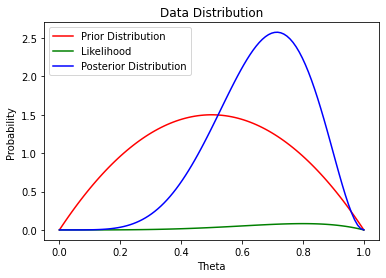

In [23]:
plot_distribution(2,2,4,1)

### Parameters: alpha=10, beta=10, D='HHTHH'

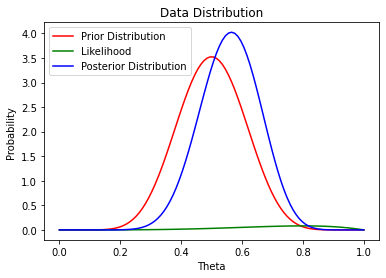

In [24]:
plot_distribution(10,10,4,1)

### Parameters: alpha=50, beta=50, D='HHTHH'

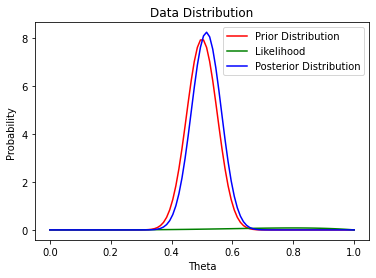

In [25]:
plot_distribution(50,50,4,1)

### Parameters: alpha=2, beta=50, D='HHTHH'

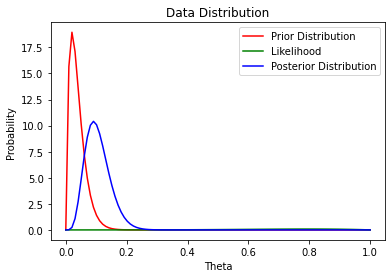

In [26]:
plot_distribution(2,50,4,1)

### Parameters: alpha=50, beta=2, D='HHTHH'

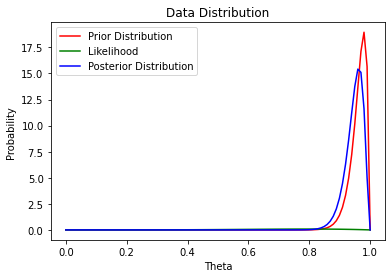

In [27]:
plot_distribution(50,2,4,1)

### Parameters: alpha=2, beta=1, D='HHTHH'

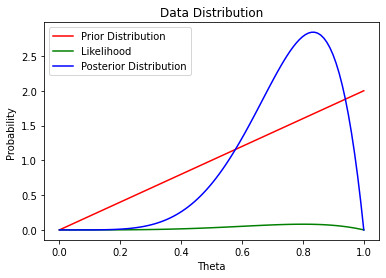

In [28]:
plot_distribution(2,1,4,1)

# Compute posterior predictive, p(obs=H|HHTHH)

P('H'|D,θ) = ∫ p('H'|θ) p(θ|D) dθ



In [29]:
def posterior_predictive(a,b,Num_head,Num_tail):
  
  theta=np.linspace(0, 1, 100)
  step_size=0.01

  random_var=beta(a,b)
  prior=random_var.pdf(theta)

  likeli_hood=likelihood(theta,Num_head,Num_tail)
  post=posterior(likeli_hood,prior,step_size)
  post_pred=np.sum((post*theta)*stepsize)
  return post_pred 

In [30]:
# alpha=2,beta=2,D=HHTHH
posterior_predictive(2,2,4,1)

0.6666666278118167

In [31]:
# alpha=20,beta=20,D=HHTHH
posterior_predictive(20,20,4,1)

0.5333333333333332

In [32]:
# alpha=100,beta=100,D=HHTHH
posterior_predictive(100,100,4,1)

0.5073170731707316

In [33]:
# alpha=2,beta=200,D=HHTHH
posterior_predictive(2,200,4,1)

0.02895637910657895

# Model Selection: Which model provides a better account of the data 'HHTH'?

We know the marginal likelihood is given by:
$$
p(D|M)=\int p(D|\theta)p(\theta|M) d\theta
$$

Given data, $D=HHTH$ \\
$Nh$=Number of heads=3 \\
$Nt$=Number of tails=1 \\

The marginal likelihood for model 1 is computed as following: 

$$
\begin{aligned}
p(D|M_1) &= \int_{0}^{1}p(D|\theta)p(\theta|M_1)d \theta\\
&= \int_{0}^{1} Bernoulli('HHTH'|\theta)*\delta(0.5) ~ d\theta\\
&= \int_{0}^{1} \theta^{N_H}(1-\theta)^{N_T} * \delta(0.5)~d\theta\\
&=  \int_{0}^{1} \theta^{3}(1-\theta)^{1}*\delta(0.5) d\theta\\
&= \int_{0}^{1} (\theta^{3} -\theta^{4})*\delta(0.5) d\theta\\
&= \frac{1}{8} - \frac{1}{16}\\
&= \frac{1}{16}
\end{aligned} 
$$

\\

The marginal likelihood for model 2 is computed as following: 

$$
\begin{aligned}
p(D|M_2) &= \int_{0}^{1}p(D|\theta)p(\theta|M_2)d \theta\\
&= \int_{0}^{1} Bernoulli('HHTH'|\theta)*Beta(2,2) d\theta\\
&= \int_{0}^{1} \theta^{N_H}(1-\theta)^{N_T} * \frac{\Gamma(\alpha+\beta)}{\Gamma{\alpha}\Gamma{\beta}}\theta^{\alpha-1}(1-\theta)^{\beta-1} d\theta\\
&= \int_{0}^{1} \frac{\Gamma(\alpha+\beta)}{\Gamma{\alpha}\Gamma{\beta}}\theta^{N_H+\alpha-1}(1-\theta)^{N_T+\beta-1} d\theta\\
&= \int_{0}^{1} \frac{\Gamma(2+2)}{\Gamma{2}\Gamma{2}}\theta^{2+3-1}(1-\theta)^{2+1-1} d\theta\\
&= \int_{0}^{1} 6*\theta^{4}(1-\theta)^{2} d\theta\\
&= 6 * \int_{0}^{1} \theta^{4}(1-\theta)^{2} d\theta\\
&= 6 * \int_{0}^{1} (\theta^{6}-2\theta^{5}+\theta^{4}) d\theta\\
&= 6 * (\frac{\theta^{7}}{7}-\frac{\theta^{6}}{3}+\frac{\theta^{5}}{5})\Big|_0^1\\
&= 6 * \frac{1}{105}\\
&= \frac{2}{35}
\end{aligned} 
$$

Since the marginal likehood (evidence) of Model 2 is larger, Model 2 is better than the model 1. 

## Fair model with Θ = P(H)=0.5
 

In [34]:
theta= 0.5 
prior=1
evidence=theta**3 *(1-theta)**1
evidence

0.0625

## Complex model with P(H)=Θ with prior Beta(Θ|2,2)

In [35]:
theta= np.linspace(0, 1, 100)
stepsize=0.01
random_var=beta(2,2)
prior=random_var.pdf(theta)
likelihood=theta**3 *(1-theta)**1
evidence=np.sum((prior*likelihood)*stepsize)
evidence

0.056571426510358486

## The first model provides a better account of the data since it has the higher evidence. 